In [45]:
library(tidyr)
library(dplyr)
library(ggplot2)

In [2]:
#import habitat and survivorship data
nutri = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_nutrients.csv", 
                header = T
)
head(nutri, n=2)
dim(nutri)


sst = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_sst_chla.csv", 
                header = T
)
head(sst, n=2)
dim(sst)


chla = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/chla_sst_outplant_stations.csv", 
                header = T
)
head(chla, n=2)
dim(chla)

tcm = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_TCM_combo.csv", 
                header = T
)
head(tcm, n=2)
dim(tcm)


live = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_apal_live.csv", 
                header = T
)
head(live, n=2)
dim(live)

,Samp_trip,file,zhang_ID,reef,collection_date,Month,Year,Si.uM.,NO2.uM.,N.N.uM.,⋯,date_processed,STD,Wash,watercolumn,transect,filtered,chloroform,dilution_factor,latitude,longitude
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,1,POR_nutrients_samp_trip1,Zhang-03,cf,26-Nov-18,November,2018,1.153,0.023,0.673,⋯,12/20/18,LNSW,LNSW,bottom,AC12,yes,yes,NA,NA,NA
2,2,POR_nutrients_samp_trip2,Zhang-01,cf,28-Feb-19,February,2019,0.335,0.022,0.996,⋯,3/7/19,LNSW,LNSW,bottom,Ap 35,yes,yes,NA,NA,NA


[1] 80 23

,reef,collection_date,Year,Month,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,pr,14-Nov-18,2018,November,24.985,-80.416,0.9965124,0.6535258,27.42548,0.1301989
2,gr,15-Nov-18,2018,November,25.110,-80.304,0.7318034,0.4607393,27.50922,0.1089550


[1] 20 10

,reef,Year,collection_date,Lat_decimal,Long_decimal,avg_chla_8day_.mg.m.3.,sd_chla_8day_.mg.m.3.,avg_chla_monthly_.mg.m.3.,sd_chla_monthly_.mg.m.3.,avg.SST..deg.C.,sd.SST..deg.C.
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cf,2018,26-Nov-18,25.221,-80.21,1.1299891,0.6305609,1.481547,0.8310220,26.61859,0.1554472
2,cf,2019,28-Feb-19,25.221,-80.21,0.6960258,0.4539086,1.249507,0.8486629,25.96821,0.1514858


[1] 20 11

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,place
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,22-Oct-18,36.25,156.41,-33.22,14.51,23.4131,cf,top
2,22-Oct-18,36.25,156.39,-33.22,14.52,23.2627,cf,top


[1] 730278      8

,reef,Genotype,Fragment_num,collection_date,day,Month,Year,Survey.,Fragment_number,LiveFrag,ColType,L,W,H,live_per,Adjusted.Area,S01FragCount
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>
1,gr,ML2,1,15-Jun-18,15,June,2018,1,A,1,L,7,NA,NA,100.00%,27.2065,7
2,gr,ML2,1,15-Jun-18,15,June,2018,1,B,1,L,8,NA,NA,100.00%,23.2441,7


[1] 9013   17

In [3]:
#added column headers to this file. Imported habitat data will be merged with this file and the final merged file will be used in microbiome analysis
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_seq.csv", 
                header = T
)
head(meta, n=2)
dim(meta)

,sample_ID,bag_num,sample_ID2,Fragment_number,Health,collection_date,Month,Year,Samp_trip,joining_info,⋯,sampling_trip,X,colour_reef,colour_genotype,colour_reef_genotype,colour_timepoint,colour_timepoint_reef,cluster_latitude,cluster_longitude,cluster_depth
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,apal_cf_gML2_cl78_frB_AH_2019-06-25,bagnumber-1009,apal_cf_gML2_cl78_frB_AH_2019-06-25,B,AH,25-Jun-19,June,2019,Trip_3,ML2_Cluster_78_B_cf,⋯,3,NA,blue4,orangered,yellow3,maroon2,black,25.2207,-80.21037,20.9
2,apal_cf_gML2_cl78_fr3_AH_2019-06-25,bagnumber-1010,apal_cf_gML2_cl78_fr3_AH_2019-06-25,3,AH,25-Jun-19,June,2019,Trip_3,ML2_Cluster_78_3_cf,⋯,3,NA,blue4,orangered,yellow3,maroon2,black,25.2207,-80.21037,20.9


[1] 363  26

In [4]:
#get depth information
meta%>%
  group_by(reef) %>%
  summarise(mean_cluster_depth = mean(cluster_depth, na.rm = TRUE),
            sd_cluster_depth = sd(cluster_depth, na.rm = TRUE))


reef,mean_cluster_depth,sd_cluster_depth
<chr>,<dbl>,<dbl>
cf,18.99639,1.2176993
ndr,12.09124,0.6238489
pr,17.02014,1.0495120


## Add nutrients data

In [5]:
head(nutri, n=2)
dim(nutri)

,Samp_trip,file,zhang_ID,reef,collection_date,Month,Year,Si.uM.,NO2.uM.,N.N.uM.,⋯,date_processed,STD,Wash,watercolumn,transect,filtered,chloroform,dilution_factor,latitude,longitude
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,1,POR_nutrients_samp_trip1,Zhang-03,cf,26-Nov-18,November,2018,1.153,0.023,0.673,⋯,12/20/18,LNSW,LNSW,bottom,AC12,yes,yes,NA,NA,NA
2,2,POR_nutrients_samp_trip2,Zhang-01,cf,28-Feb-19,February,2019,0.335,0.022,0.996,⋯,3/7/19,LNSW,LNSW,bottom,Ap 35,yes,yes,NA,NA,NA


[1] 80 23

In [6]:
nutri_sum= nutri %>%
filter(chloroform=="yes") %>%
filter(filtered=="yes") %>%
select(-c(STD, Wash, file, zhang_ID, latitude,longitude, NH4.uM.,  dilution_factor, Samp_trip)) %>%
group_by(collection_date, reef) %>%
summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE)))  %>%
right_join(meta)

head(nutri_sum, n=2)

`summarise()` has grouped output by 'collection_date'. You can override using the `.groups`
argument.
Joining with `by = join_by(collection_date, reef, Year)`


collection_date,reef,Year,Si.uM.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,sample_ID,bag_num,⋯,sampling_trip,X,colour_reef,colour_genotype,colour_reef_genotype,colour_timepoint,colour_timepoint_reef,cluster_latitude,cluster_longitude,cluster_depth
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1-Mar-19,pr,2019,0.504,0.015,0.729,0.714,0.037,apal_pr_gCN2_cl75_fr3_AH_2019-03-01,bagnumber-584,⋯,2,NA,greenyellow,blue4,maroon2,blue4,orangered,24.98454,-80.41658,15.7
1-Mar-19,pr,2019,0.504,0.015,0.729,0.714,0.037,apal_pr_gCN2_cl75_fr4_AH_2019-03-01,bagnumber-585,⋯,2,NA,greenyellow,blue4,maroon2,blue4,orangered,24.98454,-80.41658,15.7


In [7]:
nutri_sum %>%
  group_by(reef) %>%
  summarise(across(c(Si.uM., NO2.uM., N.N.uM.,NO3.uM.,PO4.uM.),
 list(mean = mean, sd = sd), na.rm = TRUE))

nutri_sum %>%
  group_by(	sampling_trip) %>%
  summarise(across(c(Si.uM., NO2.uM., N.N.uM.,NO3.uM.,PO4.uM.), mean, na.rm=TRUE))



nutri_sum %>%
group_by(sampling_trip) %>%
  summarise(across(c(Si.uM., NO2.uM., N.N.uM., NO3.uM., PO4.uM.),
                   list(mean = mean, sd = sd), na.rm = TRUE))

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(...)`.
ℹ In group 1: `reef = "cf"`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


reef,Si.uM._mean,Si.uM._sd,NO2.uM._mean,NO2.uM._sd,N.N.uM._mean,N.N.uM._sd,NO3.uM._mean,NO3.uM._sd,PO4.uM._mean,PO4.uM._sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cf,0.4169257,0.2237507,0.02617269,0.006344526,0.9171084,0.4026000,0.8909357,0.3981003,0.05254819,0.011973026
ndr,0.2879505,0.2157364,0.02554952,0.005678762,0.8917198,0.5199243,0.8663986,0.5156914,0.04450483,0.009994989
pr,0.7821854,0.6565990,0.01946445,0.004343713,0.8958032,0.4655999,0.8759966,0.4631303,0.05365711,0.025186997


sampling_trip,Si.uM.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.3879794,0.02012371,0.8619072,0.8417835,0.04439175
3,0.6040663,0.02675000,1.3861990,1.3594490,0.04232143
4,0.1113924,0.03005425,1.0992495,1.0692134,0.06350814
5,0.8964026,0.01701498,0.2257097,0.2084869,0.05226779


sampling_trip,Si.uM._mean,Si.uM._sd,NO2.uM._mean,NO2.uM._sd,N.N.uM._mean,N.N.uM._sd,NO3.uM._mean,NO3.uM._sd,PO4.uM._mean,PO4.uM._sd
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.3879794,0.09022252,0.02012371,0.0040343776,0.8619072,0.10952426,0.8417835,0.10611307,0.04439175,0.008802884
3,0.6040663,0.07072867,0.02675000,0.0043305734,1.3861990,0.29096541,1.3594490,0.29429071,0.04232143,0.017890597
4,0.1113924,0.07842576,0.03005425,0.0037965188,1.0992495,0.22763215,1.0692134,0.22557162,0.06350814,0.016968174
5,0.8964026,0.82168610,0.01701498,0.0009586266,0.2257097,0.08351875,0.2084869,0.08454956,0.05226779,0.020463114


## Add temperature and chla sampling time points only

In [8]:
sst_sum=nutri_sum %>%
left_join(sst, join_by( collection_date,reef))

head(sst_sum, n=2)
dim(sst_sum)

collection_date,reef,Year.x,Si.uM.,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,sample_ID,bag_num,⋯,cluster_longitude,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-Mar-19,pr,2019,0.504,0.015,0.729,0.714,0.037,apal_pr_gCN2_cl75_fr3_AH_2019-03-01,bagnumber-584,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
1-Mar-19,pr,2019,0.504,0.015,0.729,0.714,0.037,apal_pr_gCN2_cl75_fr4_AH_2019-03-01,bagnumber-585,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


[1] 363  39

In [9]:
sst_sum %>%
  group_by(reef) %>%
  summarise(across(c(avgchla_mgm.3, sdchla_mgm.3,avgSST_degC, sdSST_degC),mean, na.rm=TRUE))


sst_sum %>%
  group_by(	sampling_trip) %>%
  summarise(across(c(avgchla_mgm.3, sdchla_mgm.3,avgSST_degC, sdSST_degC), mean, na.rm=TRUE))


sst_sum %>%
  group_by(	sampling_trip, reef) %>%
  summarise(across(c(avgchla_mgm.3, sdchla_mgm.3,avgSST_degC, sdSST_degC), mean, na.rm=TRUE))

reef,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
cf,1.1761927,0.2864686,28.03571,0.3192992
ndr,2.7947048,1.1108525,28.15294,0.4509198
pr,0.8230158,0.4273185,28.01235,0.4725095


sampling_trip,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<int>,<dbl>,<dbl>,<dbl>,<dbl>
2,1.309320,0.5027171,26.15333,0.2846518
3,2.161787,1.0504478,29.72977,0.5284551
4,1.346144,0.1348583,29.15394,0.5567160
5,1.741090,0.8471071,27.37384,0.3645473


`summarise()` has grouped output by 'sampling_trip'. You can override using the `.groups`
argument.


sampling_trip,reef,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,cf,0.6960258,0.4539086,25.96821,0.1514858
2,ndr,2.7002575,0.8883858,26.45431,0.4208808
2,pr,0.3999531,0.1630120,25.99442,0.2483825
3,cf,1.7920917,0.3763544,29.63623,0.5081026
3,ndr,3.0906976,1.6064865,30.03815,0.3614116
3,pr,1.5077771,0.9649057,29.49291,0.7047354
4,cf,1.1930631,0.0000000,29.41868,0.4285187
4,ndr,1.9975726,0.0000000,29.05134,0.6739111
4,pr,0.8388900,0.3133472,29.12768,0.5098662


In [10]:
head (nutri_sum %>%
gather(key = metric, value = Nutrients, c("Si.uM.", "NO2.uM.", "N.N.uM.", "NO3.uM.", "PO4.uM.")) %>%
  mutate(metric = factor(metric, levels = c("Si.uM.", "NO2.uM.", "N.N.uM.", "NO3.uM.", "PO4.uM.")))  %>%
separate(col = Samp_trip, into = c("trip_lab", "trip_num"), sep = "_") %>%
  select(-trip_lab))

collection_date,reef,Year,sample_ID,bag_num,sample_ID2,Fragment_number,Health,Month,trip_num,⋯,colour_reef,colour_genotype,colour_reef_genotype,colour_timepoint,colour_timepoint_reef,cluster_latitude,cluster_longitude,cluster_depth,metric,Nutrients
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1-Mar-19,pr,2019,apal_pr_gCN2_cl75_fr3_AH_2019-03-01,bagnumber-584,apal_pr_gCN2_cl75_fr3_AH_2019-03-01,3,AH,March,2,⋯,greenyellow,blue4,maroon2,blue4,orangered,24.98454,-80.41658,15.7,Si.uM.,0.504
1-Mar-19,pr,2019,apal_pr_gCN2_cl75_fr4_AH_2019-03-01,bagnumber-585,apal_pr_gCN2_cl75_fr4_AH_2019-03-01,4,AH,March,2,⋯,greenyellow,blue4,maroon2,blue4,orangered,24.98454,-80.41658,15.7,Si.uM.,0.504
1-Mar-19,pr,2019,apal_pr_gCN2_cl75_fr7_AH_2019-03-01,bagnumber-586,apal_pr_gCN2_cl75_fr7_AH_2019-03-01,7,AH,March,2,⋯,greenyellow,blue4,maroon2,blue4,orangered,24.98454,-80.41658,15.7,Si.uM.,0.504
1-Mar-19,pr,2019,apal_pr_gCN2_cl79_fr3_AH_2019-03-01,bagnumber-590,apal_pr_gCN2_cl79_fr3_AH_2019-03-01,3,AH,March,2,⋯,greenyellow,blue4,maroon2,blue4,orangered,24.98455,-80.41659,16.7,Si.uM.,0.504
1-Mar-19,pr,2019,apal_pr_gCN2_cl79_fr4_AH_2019-03-01,bagnumber-591,apal_pr_gCN2_cl79_fr4_AH_2019-03-01,4,AH,March,2,⋯,greenyellow,blue4,maroon2,blue4,orangered,24.98455,-80.41659,16.7,Si.uM.,0.504
1-Mar-19,pr,2019,apal_pr_gCN2_cl79_fr6_AH_2019-03-01,bagnumber-592,apal_pr_gCN2_cl79_fr6_AH_2019-03-01,6,AH,March,2,⋯,greenyellow,blue4,maroon2,blue4,orangered,24.98455,-80.41659,16.7,Si.uM.,0.504


Warning message in geom_point(aes(fill = reef), height = 0, width = 0.2, pch = 21):
“Ignoring unknown parameters: `height` and `width`”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


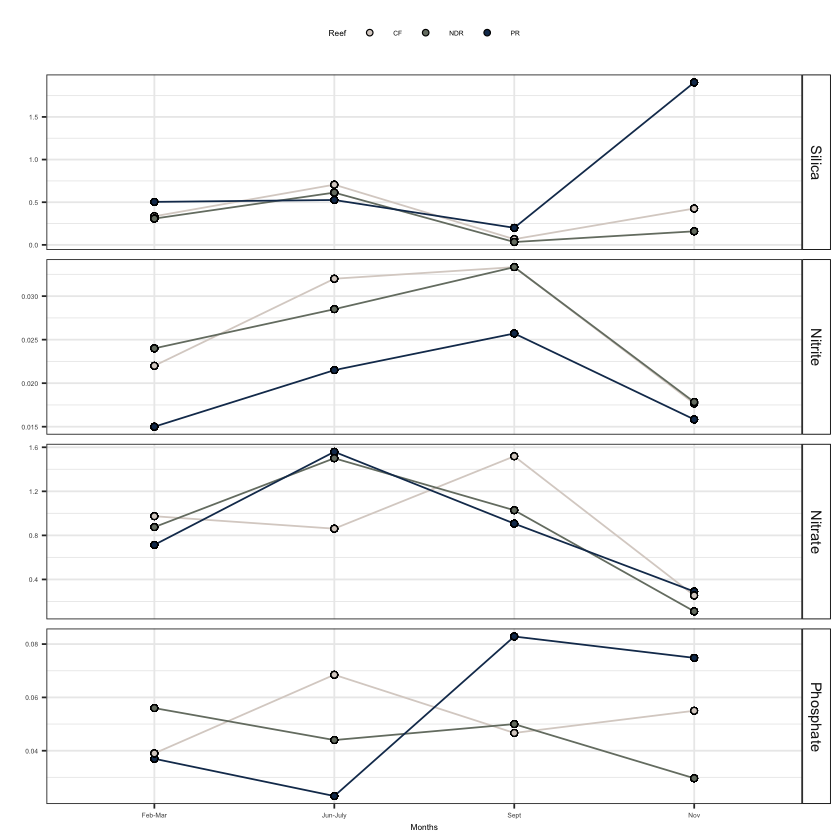

In [11]:
#Nutrients plot
nut_lab=c("Silica", "Nitrite", "Nitrate", "Phosphate")
names(nut_lab) <- c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM.")
lab2=c("CF", "NDR", "PR")
nutri_sum %>%
gather(key = metric, value = Nutrients, c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM.")) %>%
  mutate(metric = factor(metric, levels = c("Si.uM.", "NO2.uM.", "NO3.uM.", "PO4.uM."))) %>%
  ggplot(aes(x = Samp_trip, y = Nutrients, group=reef)) +
geom_line(aes(color = reef)) +
geom_point(aes(fill = reef), height = 0, width = .2, pch=21) +
scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_fill_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_x_discrete( name = "Months", labels=c("Trip_2" = "Feb-Mar", "Trip_3" = "Jun-July",
                          "Trip_4" = "Sept", "Trip_5"="Nov")) +

facet_grid(metric~., scales = "free_y",
          labeller = labeller(metric = nut_lab)) +
#xlab("Months") +
ylab("") +
theme_bw() +
guides(color="none") +
guides(fill=guide_legend(title="Reef")) +
theme(legend.text =element_text(size=5),legend.position="top") +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 

#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/supl_fig2.png", width = 4,
 #      height = 4, units = "in", dpi=300)     

## percent live fragment 

In [12]:
live_sum <- live %>%
group_by(collection_date, reef, Genotype) %>%
  summarise(total_count = n(),
            LiveFrag_count = sum(LiveFrag, na.rm = TRUE)) %>%
  mutate(Survivorship = LiveFrag_count / total_count) %>% 
right_join(sst_sum)

dim(live_sum)

`summarise()` has grouped output by 'collection_date', 'reef'. You can override using the
`.groups` argument.
Joining with `by = join_by(collection_date, reef, Genotype)`


[1] 363  42

In [13]:
#write.csv(live_sum, "/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_meta_survivorship.csv", 
 #    row.names = FALSE)

In [14]:
tcm = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_TCM_combo.csv", 
                header = T, stringsAsFactors=TRUE
)
head(tcm, n=2)
dim(tcm)

,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,place
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,22-Oct-18,36.25,156.41,-33.22,14.51,23.4131,cf,top
2,22-Oct-18,36.25,156.39,-33.22,14.52,23.2627,cf,top


[1] 730278      8

In [15]:
tcm_sum= tcm %>%
filter(Speed.cm.s. <=25) %>%
group_by(collection_date) %>%
summarise(across(where(is.numeric), ~ mean(.x, na.rm = TRUE))) %>%
right_join(live_sum) 
head(tcm_sum, n=2)

Joining with `by = join_by(collection_date)`


collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,total_count,LiveFrag_count,⋯,cluster_longitude,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,21,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,21,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


## TCM data

In [16]:
all_meta=tcm_sum %>%
relocate(bag_num, .before = collection_date)
dim(all_meta)

[1] 363  47

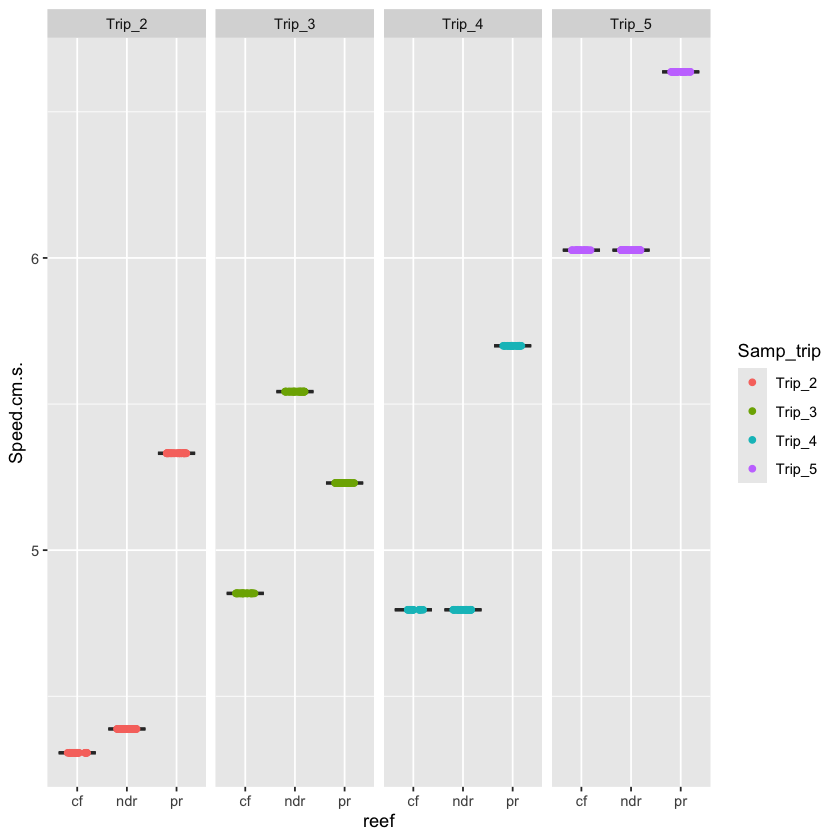

In [17]:
tcm_sum %>%
 ggplot(aes(x = reef, y = Speed.cm.s.))  +
  geom_boxplot(outlier.color = NA)  +
geom_jitter(aes(color = Samp_trip), height = 0, width = .2) +
facet_grid(.~Samp_trip)

## Time-series figure of SST,Chl-a,TCM

In [18]:
#read data for entire year (2019)

temp = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/sst_outplant_daily.csv", 
                header = T, stringsAsFactors=TRUE
)
head(temp, n=2)
dim(temp)


chl = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/chl_outplant_8day.csv", 
                header = T, stringsAsFactors=TRUE
)
head(chl, n=2)
dim(chl)

,date,decimal_year,avg_sst,reef
,<fct>,<dbl>,<dbl>,<fct>
1,1-Jan-19,2019.003,24.96226,cf
2,2-Jan-19,2019.005,25.10979,cf


[1] 1095    4

,date,decimal_year,avg_chl,reef
,<fct>,<dbl>,<dbl>,<fct>
1,29-Jan-19,2019.079,0.7101063,cf
2,6-Feb-19,2019.101,1.1661320,cf


[1] 129   4

In [19]:
#alter date format
chl_all = chl %>%
  separate(col = date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
  select(-date)
head(chl_all)
dim(chl_all)

,month,year,decimal_year,avg_chl,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>
1,Jan,2019,2019.079,0.7101063,cf,2019-Jan-29
2,Feb,2019,2019.101,1.1661320,cf,2019-Feb-6
3,Feb,2019,2019.123,0.2026868,cf,2019-Feb-14
4,Feb,2019,2019.145,0.6445027,cf,2019-Feb-22
5,Mar,2019,2019.167,1.2104095,cf,2019-Mar-2
6,Mar,2019,2019.189,1.1574974,cf,2019-Mar-10


[1] 129   6

In [20]:
#alter date format
chla_points = chla %>%
filter(reef!="gr")  %>%
  separate(col = collection_date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
filter(year!="2018")  %>%
#subset(Date> "2019-1-01" & Date < "2019-12-01") %>%
  select(-date)

head(chla_points, n=2)

chla_points$Date <- as.Date(chla_points$Date, format = "%Y-%b-%d")

,reef,Year,month,year,Lat_decimal,Long_decimal,avg_chla_8day_.mg.m.3.,sd_chla_8day_.mg.m.3.,avg_chla_monthly_.mg.m.3.,sd_chla_monthly_.mg.m.3.,avg.SST..deg.C.,sd.SST..deg.C.,Date
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,cf,2019,Feb,2019,25.221,-80.21,0.6960258,0.4539086,1.249507,0.8486629,25.96821,0.1514858,2019-Feb-28
2,cf,2019,Jun,2019,25.221,-80.21,1.7920917,0.3763544,1.840000,1.0261407,29.63623,0.5081026,2019-Jun-25


In [21]:
#alter date format
temp_all = temp %>%
  separate(col = date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
  select(-date)
head(temp_all)
dim(temp_all)



,month,year,decimal_year,avg_sst,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>
1,Jan,2019,2019.003,24.96226,cf,2019-Jan-1
2,Jan,2019,2019.005,25.10979,cf,2019-Jan-2
3,Jan,2019,2019.008,25.14815,cf,2019-Jan-3
4,Jan,2019,2019.011,25.41415,cf,2019-Jan-4
5,Jan,2019,2019.014,25.37185,cf,2019-Jan-5
6,Jan,2019,2019.016,25.49293,cf,2019-Jan-6


[1] 1095    6

In [22]:
#date format
temp_all$Date <- as.Date(temp_all$Date, format = "%Y-%b-%d")
head(temp_all)

chl_all$Date <- as.Date(chl_all$Date, format = "%Y-%b-%d")
head(chl_all)

,month,year,decimal_year,avg_sst,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<date>
1,Jan,2019,2019.003,24.96226,cf,2019-01-01
2,Jan,2019,2019.005,25.10979,cf,2019-01-02
3,Jan,2019,2019.008,25.14815,cf,2019-01-03
4,Jan,2019,2019.011,25.41415,cf,2019-01-04
5,Jan,2019,2019.014,25.37185,cf,2019-01-05
6,Jan,2019,2019.016,25.49293,cf,2019-01-06


,month,year,decimal_year,avg_chl,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<date>
1,Jan,2019,2019.079,0.7101063,cf,2019-01-29
2,Feb,2019,2019.101,1.1661320,cf,2019-02-06
3,Feb,2019,2019.123,0.2026868,cf,2019-02-14
4,Feb,2019,2019.145,0.6445027,cf,2019-02-22
5,Mar,2019,2019.167,1.2104095,cf,2019-03-02
6,Mar,2019,2019.189,1.1574974,cf,2019-03-10


In [23]:
#change TCM date format to match sst and chla
tcm_all = tcm %>%
  separate(col = collection_date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
  select(-date)


In [24]:
#change date format
tcm_all$Date <- as.Date(tcm_all$Date, format = "%Y-%b-%d")
head(tcm_all)

,month,year,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,place,Date
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<date>
1,Oct,2018,36.25,156.41,-33.22,14.51,23.4131,cf,top,2018-10-22
2,Oct,2018,36.25,156.39,-33.22,14.52,23.2627,cf,top,2018-10-22
3,Oct,2018,36.25,156.37,-33.21,14.53,23.4311,cf,top,2018-10-22
4,Oct,2018,36.25,156.31,-33.20,14.57,23.3317,cf,top,2018-10-22
5,Oct,2018,36.25,156.41,-33.22,14.51,23.0338,cf,top,2018-10-22
6,Oct,2018,36.25,155.94,-33.10,14.78,22.7789,cf,top,2018-10-22


In [25]:
trip_dates <- tcm_sum %>%
  separate(col = collection_date, into = c("date", "month", "year"), sep = "-") %>%
  mutate(year = paste0("20", year)) %>%
  mutate(Date = paste(year, month, date, sep = "-")) %>%
  select(-date)

In [26]:
head(trip_dates)

month,year,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,total_count,⋯,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,Date
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,⋯,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-Mar-1
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-Mar-1
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-Mar-1
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-Mar-1
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-Mar-1
Mar,2019,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825,2019-Mar-1


In [27]:
trip_dates$Date <- as.Date(trip_dates$Date, format = "%Y-%b-%d")

In [28]:
tcm_all %>%
filter(year ==2019) %>%
filter(year !=2020) %>%
filter(Speed.cm.s. <=25) %>%
  group_by(reef) %>%
  summarise(across(c(Speed.cm.s., Bearing.degrees.),
                    list(mean = mean, sd = sd), na.rm = TRUE))

tcm_all %>%
filter(year ==2019) %>%
filter(year !=2020) %>%
filter(Speed.cm.s. <=25) %>%
  group_by(month) %>%
  summarise(across(c(Speed.cm.s., Bearing.degrees.),
                
                    list(mean = mean, sd = sd), na.rm = TRUE))



tcm_all %>%
filter(year ==2019) %>%
filter(year !=2020) %>%
filter(Speed.cm.s. <=25) %>%
  group_by(reef, month) %>%
  summarise(across(c(Speed.cm.s., Bearing.degrees.),
                
                    list(mean = mean, sd = sd), na.rm = TRUE))


reef,Speed.cm.s._mean,Speed.cm.s._sd,Bearing.degrees._mean,Bearing.degrees._sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
cf,6.904208,3.177204,194.8472,96.5430
ndr,6.189781,3.272774,185.2327,101.5707
pr,7.766164,3.546758,173.4437,106.9176


month,Speed.cm.s._mean,Speed.cm.s._sd,Bearing.degrees._mean,Bearing.degrees._sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Apr,7.683522,3.418629,170.3734,119.18109
Aug,5.589410,3.002489,152.3936,102.80964
Dec,8.222867,2.991153,187.4883,55.23375
Feb,7.021917,3.017407,188.1338,113.70096
Jan,7.132028,3.658309,186.8435,109.46357
Jul,6.107752,3.203048,168.8952,108.25373
Jun,5.827390,3.139182,164.9126,106.19878
Mar,8.016809,4.009212,178.0940,102.16813
May,8.542006,4.128932,190.9584,100.70199


`summarise()` has grouped output by 'reef'. You can override using the `.groups` argument.


reef,month,Speed.cm.s._mean,Speed.cm.s._sd,Bearing.degrees._mean,Bearing.degrees._sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
cf,Apr,8.309153,3.1990519,205.6920,115.13926
cf,Dec,11.629371,0.2036253,185.5172,26.25939
cf,Jan,7.541307,2.7136257,194.2162,98.46756
cf,Mar,8.451301,3.5332899,204.3913,103.13714
cf,May,9.056154,4.1663776,177.0388,113.25390
cf,Nov,5.327454,1.6397219,190.8604,90.76798
cf,Oct,5.432806,2.2642810,188.2810,98.47328
cf,Sep,6.089397,2.6221524,201.7507,82.15441
ndr,Apr,7.370562,3.4814921,152.7059,117.22841


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


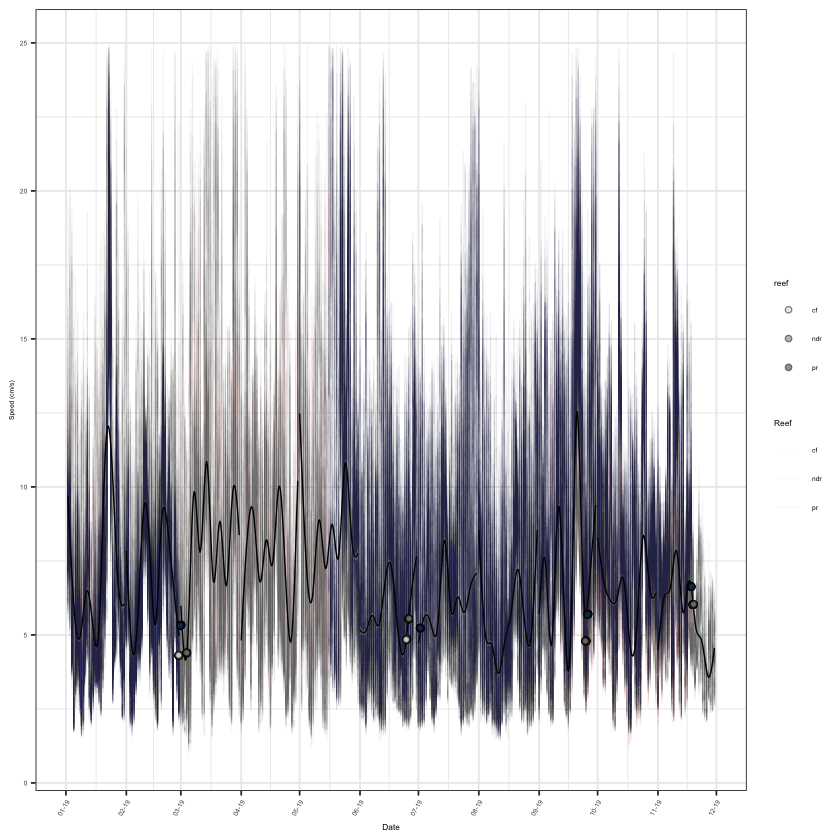

In [29]:
tcm_fig = tcm_all %>%
filter(year ==2019) %>%
filter(year !=2020) %>%
filter(Speed.cm.s. <=25) %>%
subset(Date> "2019-1-01" & Date < "2019-12-01") %>%
 ggplot(aes(x = as.Date(Date), y = Speed.cm.s., group=month)) +
geom_line(aes(x = as.Date(Date), y = Speed.cm.s., color=reef), size=0.4, alpha=0.03) +
geom_smooth(aes(x = as.Date(Date), y = Speed.cm.s.,), colour="black", size=0.4) +
geom_jitter(pch=21, alpha = 0.5,aes(fill=reef), data = trip_dates) +
theme_bw() +
scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_fill_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_fill_manual(values=c("#dad1cb","#767e72","#16375b")) +
scale_color_manual(values=c("#dad1cb","#767e72","#16375b")) +
scale_x_date(date_breaks ="1 month", date_labels ="%m-%y") +
#facet_grid(reef~.) +
theme(axis.text.x=element_text(angle = 60, hjust=1)) +
xlab("Date") +
ylab("Speed (cm/s)") +
guides(color=guide_legend(title="Reef")) +
theme(legend.text =element_text(size=3.7)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 4)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5))

tcm_fig
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/tcm.png", width = 5, height = 4, units = "in", dpi=300)

In [30]:
head(temp_all)

,month,year,decimal_year,avg_sst,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<date>
1,Jan,2019,2019.003,24.96226,cf,2019-01-01
2,Jan,2019,2019.005,25.10979,cf,2019-01-02
3,Jan,2019,2019.008,25.14815,cf,2019-01-03
4,Jan,2019,2019.011,25.41415,cf,2019-01-04
5,Jan,2019,2019.014,25.37185,cf,2019-01-05
6,Jan,2019,2019.016,25.49293,cf,2019-01-06


In [31]:
head(chl_all)

,month,year,decimal_year,avg_chl,reef,Date
,<chr>,<chr>,<dbl>,<dbl>,<fct>,<date>
1,Jan,2019,2019.079,0.7101063,cf,2019-01-29
2,Feb,2019,2019.101,1.1661320,cf,2019-02-06
3,Feb,2019,2019.123,0.2026868,cf,2019-02-14
4,Feb,2019,2019.145,0.6445027,cf,2019-02-22
5,Mar,2019,2019.167,1.2104095,cf,2019-03-02
6,Mar,2019,2019.189,1.1574974,cf,2019-03-10


In [32]:
head(chla_points)

,reef,Year,month,year,Lat_decimal,Long_decimal,avg_chla_8day_.mg.m.3.,sd_chla_8day_.mg.m.3.,avg_chla_monthly_.mg.m.3.,sd_chla_monthly_.mg.m.3.,avg.SST..deg.C.,sd.SST..deg.C.,Date
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,cf,2019,Feb,2019,25.221,-80.210,0.6960258,0.4539086,1.249507,0.8486629,25.96821,0.1514858,2019-02-28
2,cf,2019,Jun,2019,25.221,-80.210,1.7920917,0.3763544,1.840000,1.0261407,29.63623,0.5081026,2019-06-25
3,cf,2019,Sep,2019,25.221,-80.210,1.1930631,0.0000000,1.393782,0.8628705,29.41868,0.4285187,2019-09-25
4,cf,2019,Nov,2019,25.221,-80.210,0.9899462,0.1509655,1.314622,0.8991632,27.62378,0.2019326,2019-11-18
5,ndr,2019,Mar,2019,25.218,-80.294,2.7002575,0.8883858,3.527487,1.8255791,26.45431,0.4208808,2019-03-04
6,ndr,2019,Jun,2019,25.218,-80.294,3.0906976,1.6064865,6.320000,3.0271655,30.03815,0.3614116,2019-06-26


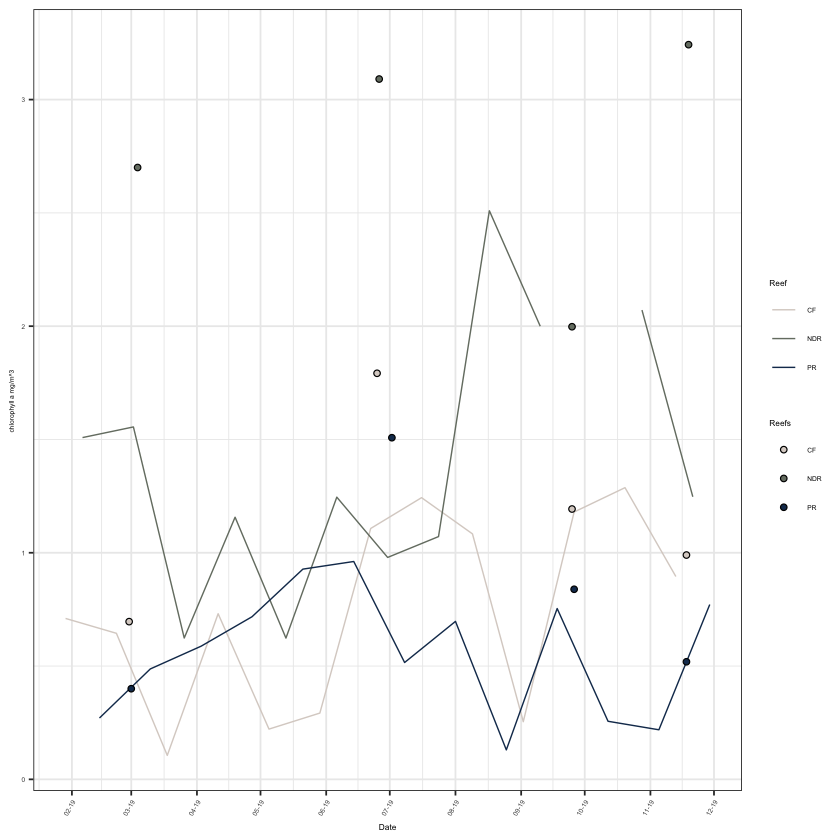

In [33]:
chla_fig = chl_all %>%
subset(Date> "2019-1-01" & Date < "2019-12-01") %>%
filter(reef==c("cf", "ndr", "pr")) %>%
ggplot(aes(x = as.Date(Date), y = 	avg_chl)) +
geom_line(aes(x = as.Date(Date), y = avg_chl, color=reef), size=0.4) +
#geom_line(aes(x = as.Date(Date), y = 	avg_chl), colour="black", size=0.4) +
#geom_point(aes(x = as.Date(Date), y = avg_chl, color=reef)) +
geom_point(pch=21, data = chla_points, aes(x = as.Date(Date), y = avg_chla_8day_.mg.m.3., fill=reef)) +
scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_fill_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
theme_bw() +
scale_x_date(date_breaks ="1 month", date_labels ="%m-%y") +
#facet_grid(reef~.) +
theme(axis.text.x=element_text(angle = 60, hjust=1)) +
xlab("Date") +
ylab(expression("chlorophyll a mg/m^3 ")) +
guides(color=guide_legend(title="Reef")) +
theme(legend.text =element_text(size=3.7)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 4)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5))
chla_fig
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/chla_fig.png", width = 5, height = 4, units = "in", dpi=300)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


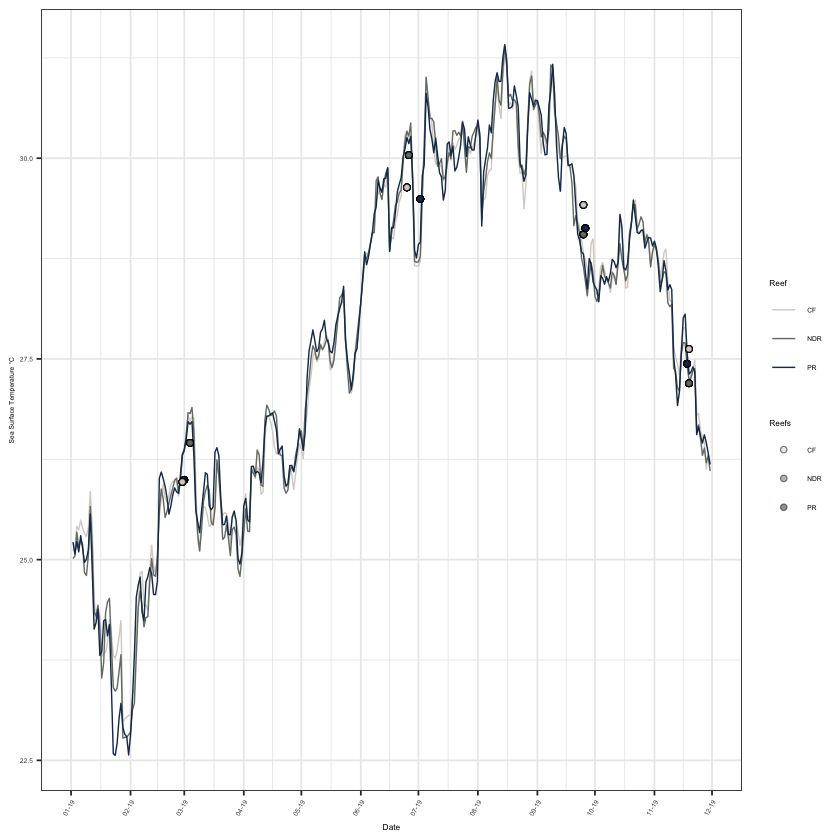

In [34]:
sst_fig = temp_all %>%
subset(Date> "2019-1-01" & Date < "2019-12-01") %>%
 ggplot(aes(x = as.Date(Date), y = avg_sst)) +
geom_line(aes(x = as.Date(Date), y = avg_sst, color=reef), size=0.4) +
geom_point( pch=21, alpha = 0.5, data = trip_dates, aes(x = as.Date(Date), y = avgSST_degC, fill=reef)) +
#geom_jitter(alpha = 0.5, data = trip_dates, aes(x = as.Date(Date), y = avg_sst)) +
theme_bw() +
scale_fill_manual(values=c("#dad1cb","#767e72","#16375b")) +
scale_color_manual(values=c("#dad1cb","#767e72","#16375b")) +
scale_x_date(date_breaks ="1 month", date_labels ="%m-%y") +
#facet_grid(reef~.) +
theme(axis.text.x=element_text(angle = 60, hjust=1)) +
scale_color_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
scale_fill_manual("Reefs", values = c("#dad1cb","#767e72","#16375b" ), labels= lab2) +
xlab("Date") +
ylab("Sea Surface Temperature °C") +
guides(color=guide_legend(title="Reef")) +
theme(legend.text =element_text(size=3.7)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 4)) +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=5))
sst_fig
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/temp_fig.png", width = 5, height = 4, units = "in", dpi=300)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


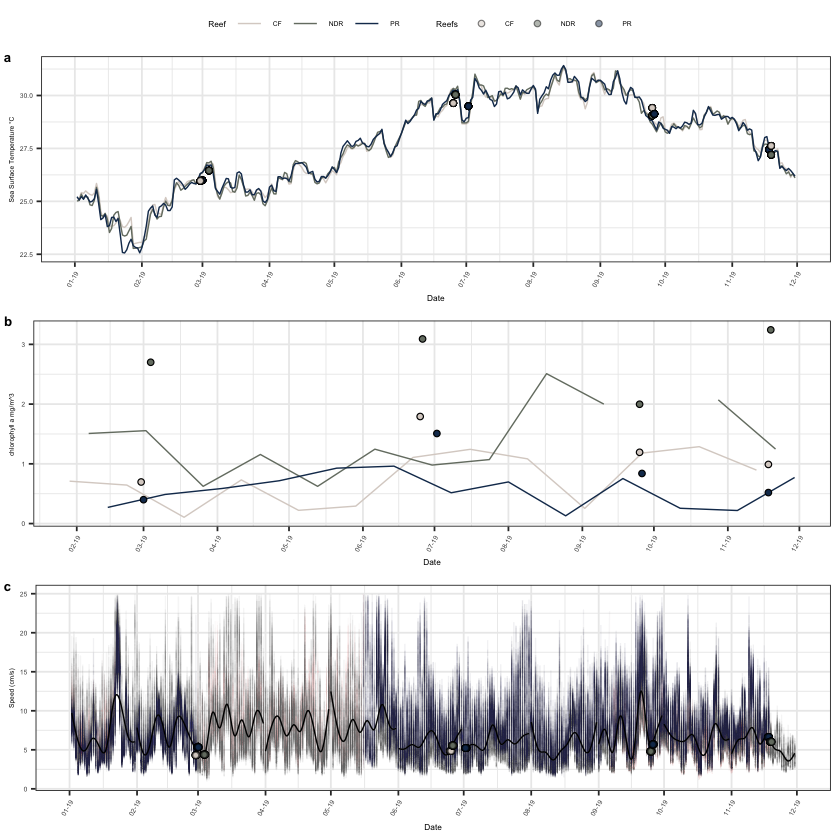

In [35]:
ggpubr::ggarrange(sst_fig, chla_fig, tcm_fig,
                 common.legend = T, ncol=1,
             labels = c("a", "b", "c"), font.label = list(size = 8))
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/supl_fig1.png", width = 5.5, height = 5, units = "in", dpi=300)     

In [36]:
#Final metadata file
#write.csv(all_meta, "/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv", 
 #      row.names = FALSE)

In [37]:
head(all_meta)

bag_num,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,total_count,⋯,cluster_longitude,cluster_depth,Year.y,Month.y,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-585,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-586,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,-80.41658,15.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-590,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,-80.41659,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-591,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,-80.41659,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-592,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,21,⋯,-80.41659,16.7,2019,March,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


## Habitat data stats

             Df Sum Sq  Mean Sq F value Pr(>F)
reef          2 0.0041 0.002057   0.358  0.699
Residuals   360 2.0692 0.005748               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log2(avgSST_degC) ~ reef, data = all_meta)

$reef
                diff         lwr        upr     p adj
ndr-cf  0.0064482233 -0.01833590 0.03123235 0.8134882
pr-cf  -0.0007346927 -0.02538737 0.02391798 0.9972916
pr-ndr -0.0071829161 -0.02851097 0.01414514 0.7078215


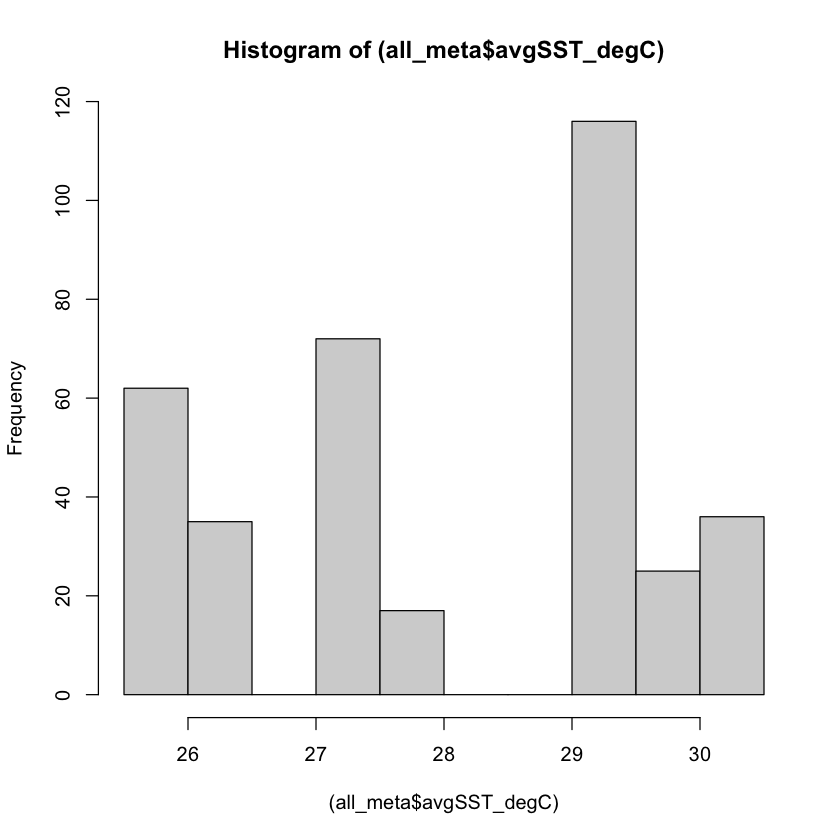

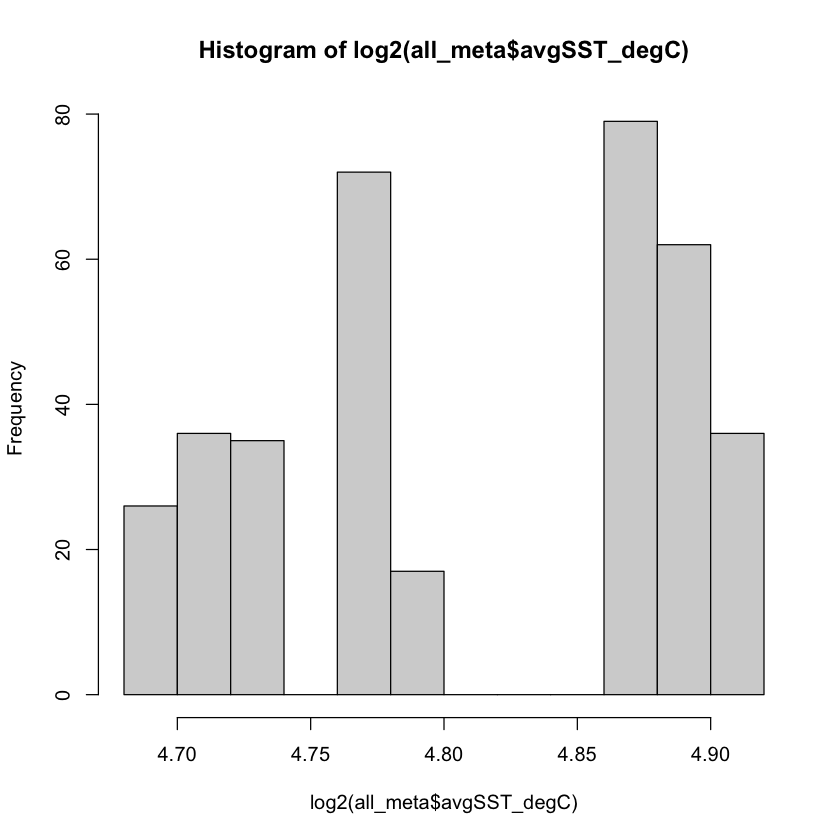

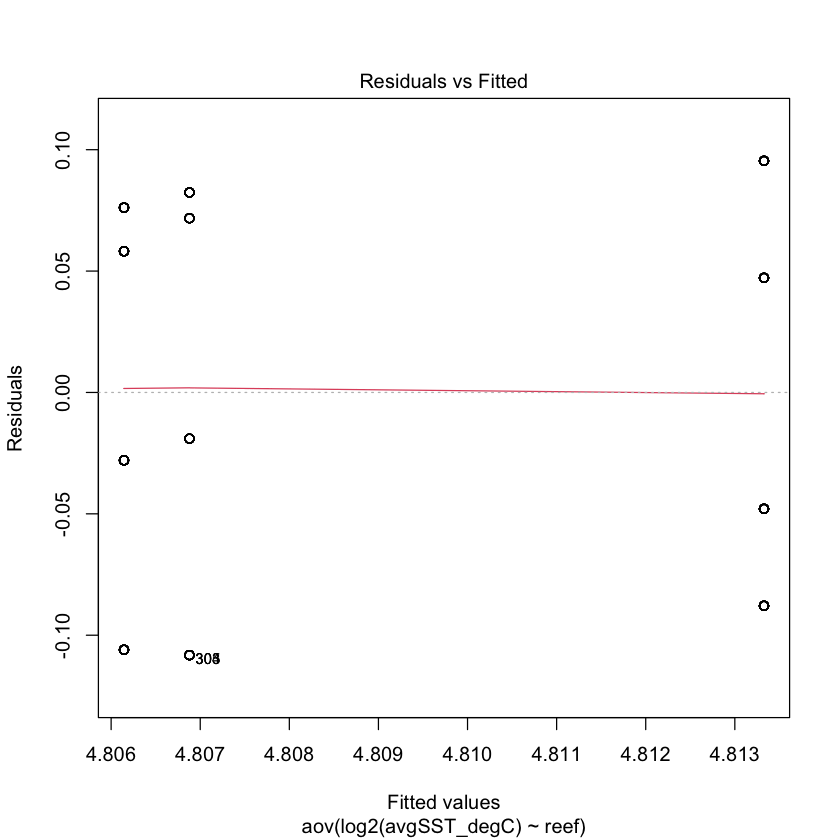

In [38]:
res= aov(log2(avgSST_degC)  ~ reef, data = all_meta)
summary(res)
TukeyHSD(res)

hist((all_meta$avgSST_degC))
hist(log2(all_meta$avgSST_degC))
plot(res, which = 1)

             Df Sum Sq Mean Sq F value Pr(>F)    
reef          2  1.366  0.6830   53.83 <2e-16 ***
Residuals   360  4.568  0.0127                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log(Speed.cm.s.) ~ reef, data = all_meta)

$reef
             diff        lwr        upr     p adj
ndr-cf 0.05987439 0.02305213 0.09669664 0.0004486
pr-cf  0.15422413 0.11759717 0.19085109 0.0000000
pr-ndr 0.09434974 0.06266223 0.12603725 0.0000000


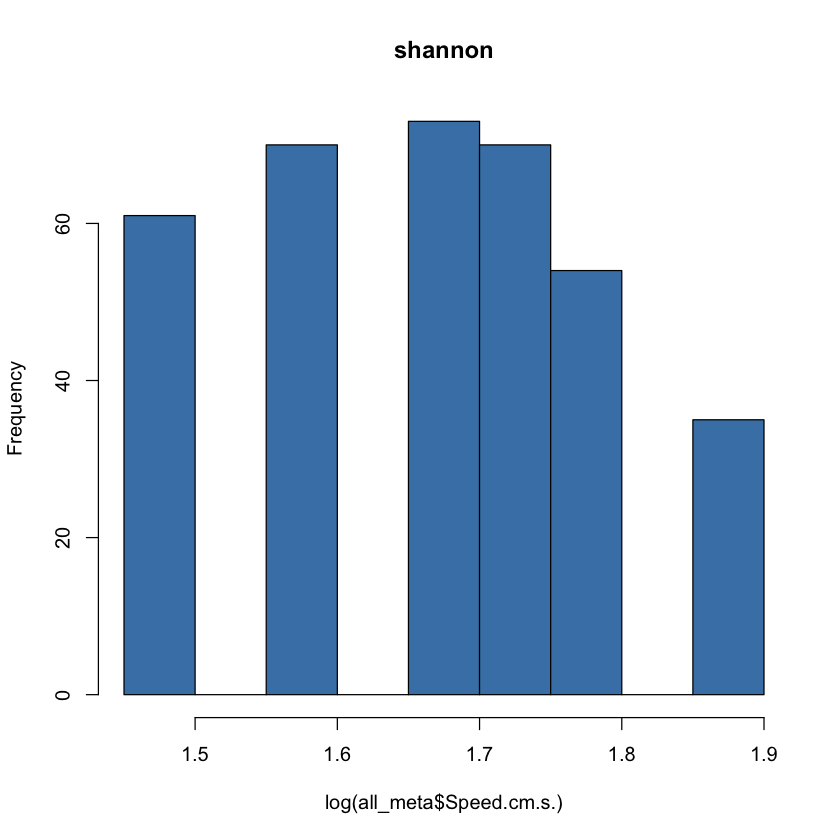

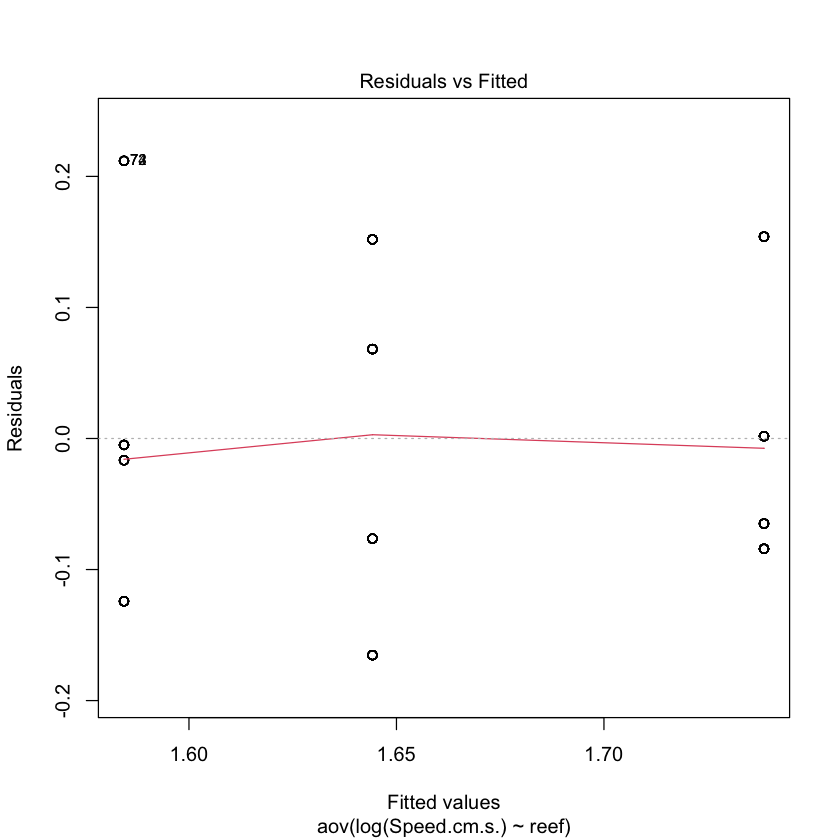

In [39]:
res= aov(log(Speed.cm.s.) ~ reef, data = all_meta)
summary(res)
TukeyHSD(res)
hist(log(all_meta$Speed.cm.s.), col='steelblue', main='shannon')
plot(res, which = 1)

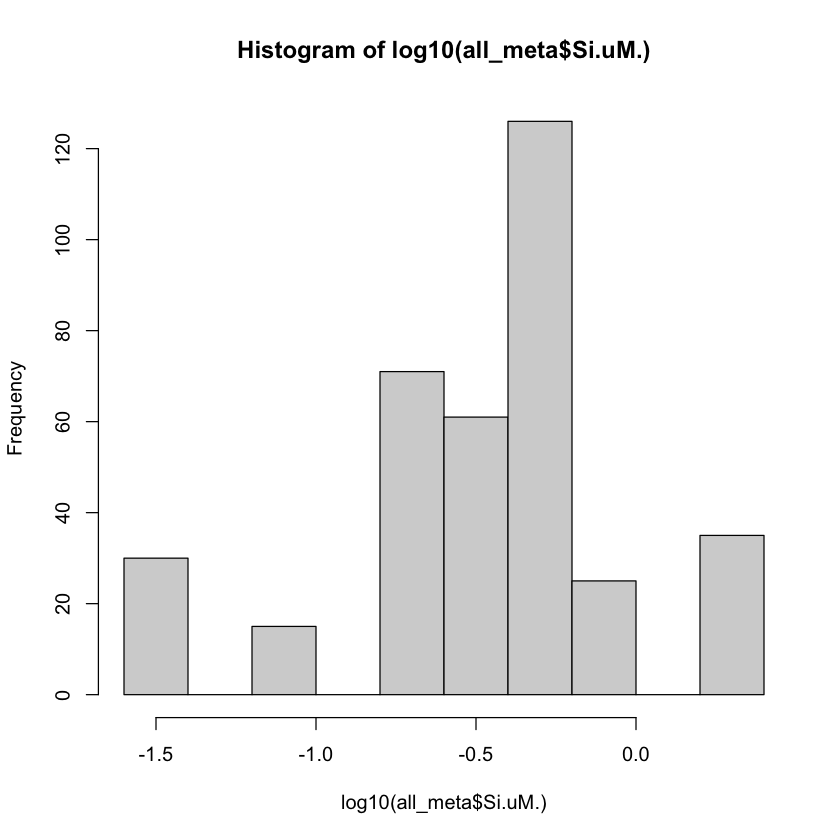

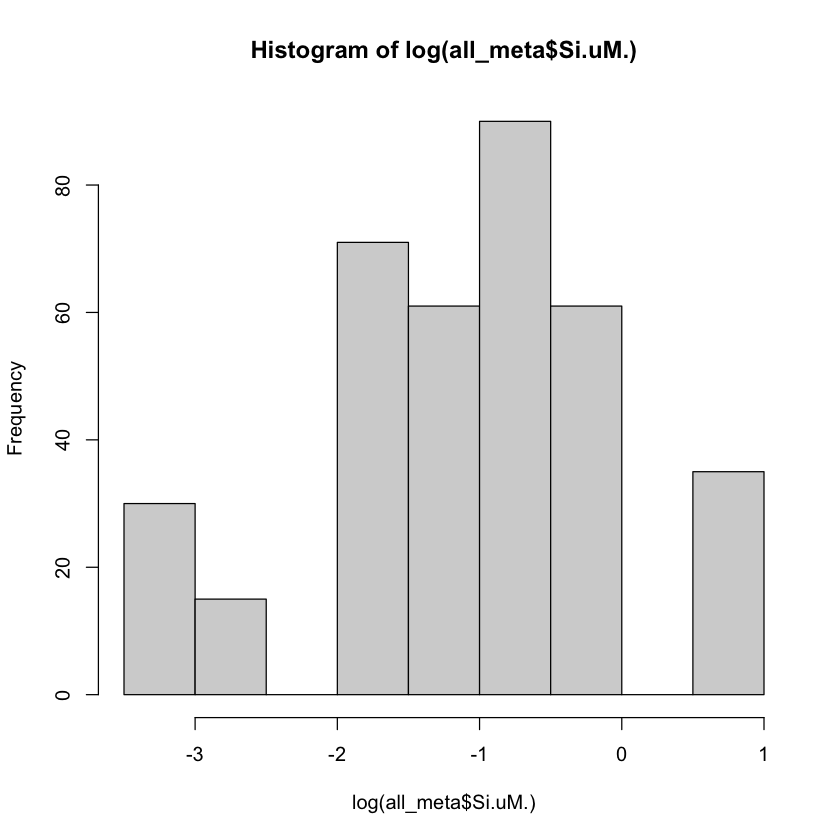

             Df Sum Sq Mean Sq F value Pr(>F)    
reef          2  83.31   41.65   51.26 <2e-16 ***
Residuals   360 292.53    0.81                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log(Si.uM.) ~ reef, data = all_meta)

$reef
             diff        lwr        upr    p adj
ndr-cf -0.5469381 -0.8416228 -0.2522534 4.87e-05
pr-cf   0.5440700  0.2509482  0.8371917 4.87e-05
pr-ndr  1.0910081  0.8374163  1.3446000 0.00e+00


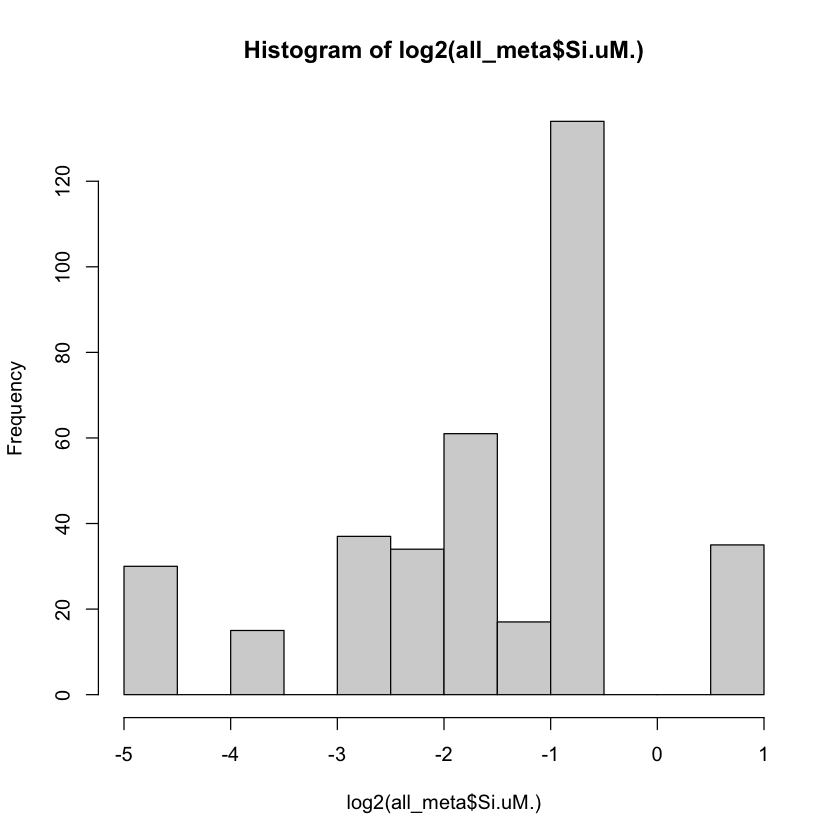

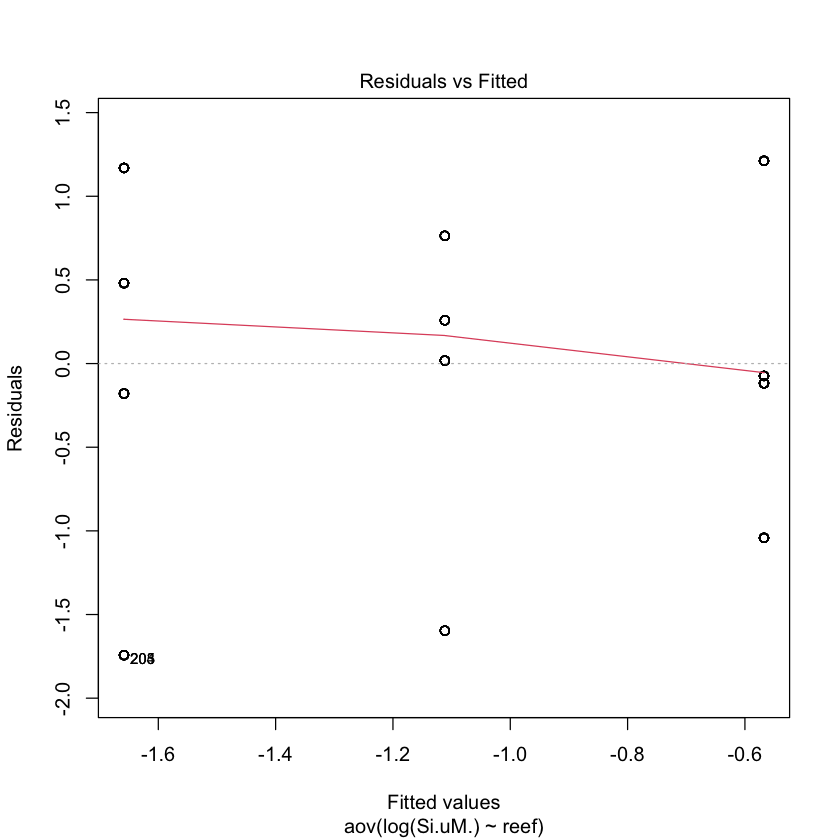

In [40]:
hist(log10(all_meta$Si.uM.))
hist(log(all_meta$Si.uM.))
hist(log2(all_meta$Si.uM.))


res= aov(log(Si.uM.) ~ reef, data = all_meta)
summary(res)
TukeyHSD(res)
plot(res, which = 1)

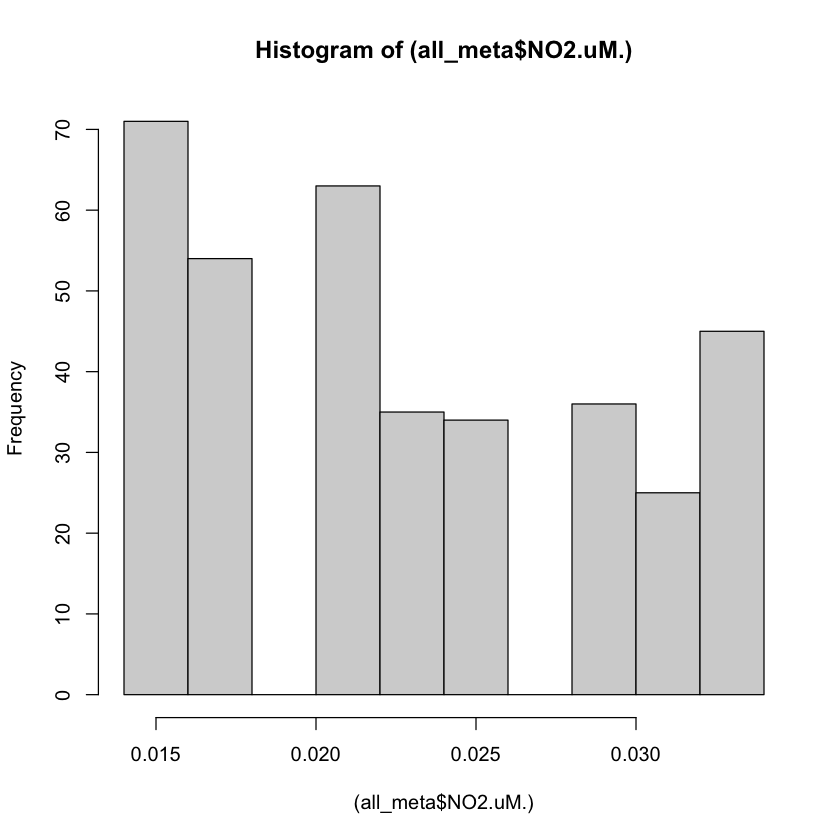

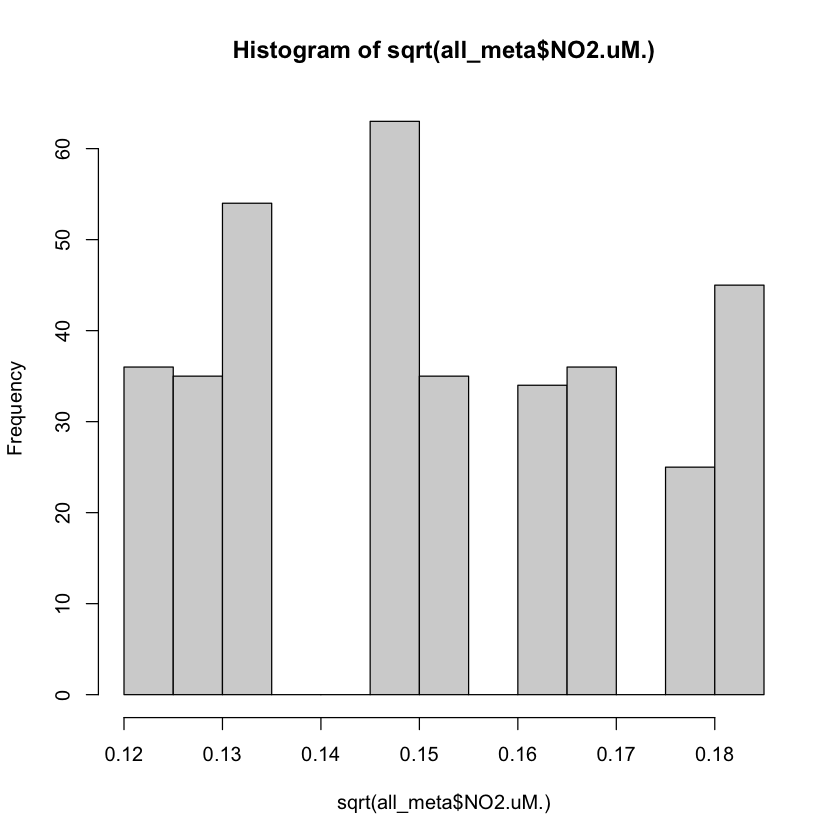

             Df Sum Sq  Mean Sq F value Pr(>F)    
reef          2 0.0376 0.018802   61.09 <2e-16 ***
Residuals   360 0.1108 0.000308                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sqrt(NO2.uM.) ~ reef, data = all_meta)

$reef
              diff          lwr          upr    p adj
ndr-cf -0.00173755 -0.007472613  0.003997514 0.755951
pr-cf  -0.02189737 -0.027602013 -0.016192720 0.000000
pr-ndr -0.02015982 -0.025095145 -0.015224489 0.000000


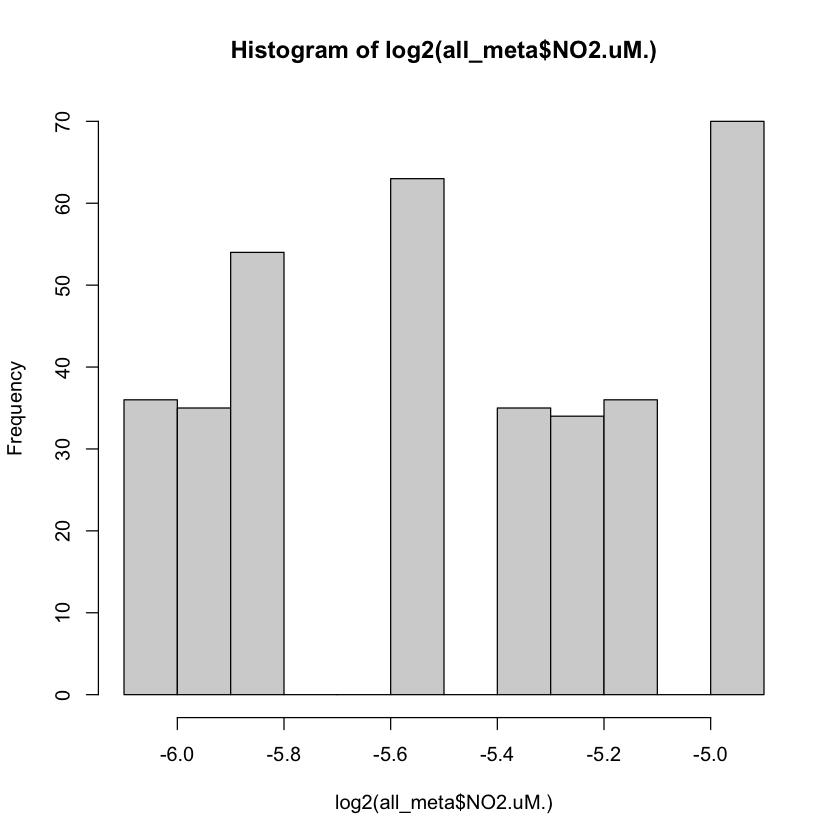

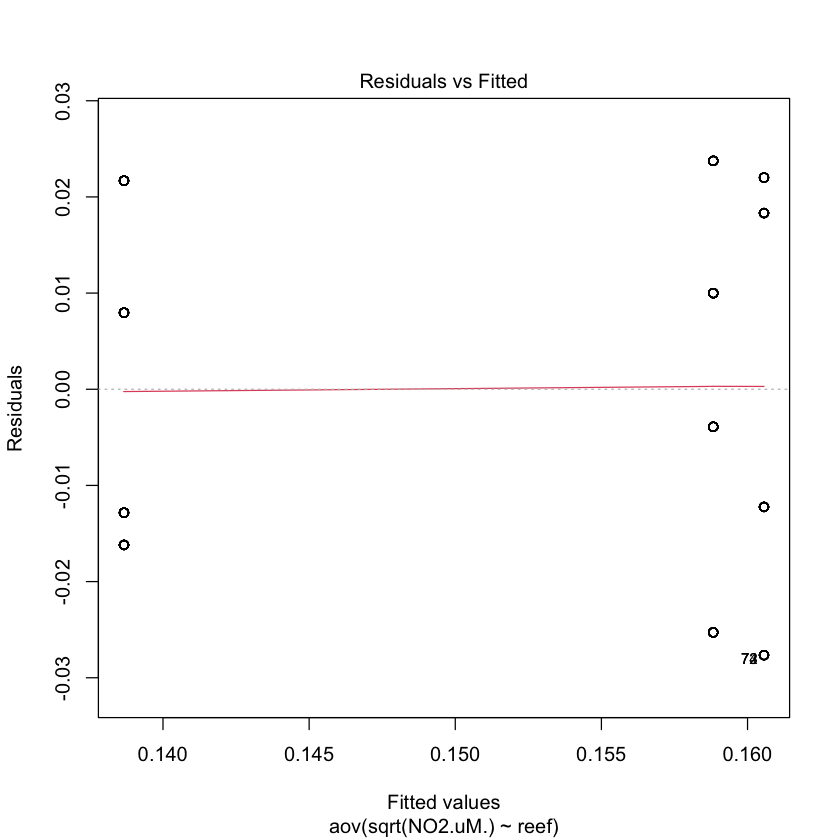

In [41]:
hist((all_meta$NO2.uM.))
hist(sqrt(all_meta$NO2.uM.))
hist(log2(all_meta$NO2.uM.))


res= aov(sqrt(NO2.uM.) ~ reef, data = all_meta)
summary(res)
TukeyHSD(res)
plot(res, which = 1)

             Df Sum Sq Mean Sq F value Pr(>F)
reef          2  0.144 0.07198   0.869   0.42
Residuals   360 29.808 0.08280               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sqrt(NO3.uM.) ~ reef, data = all_meta)

$reef
              diff         lwr        upr     p adj
ndr-cf -0.04845527 -0.14252293 0.04561240 0.4466524
pr-cf  -0.01420429 -0.10777304 0.07936447 0.9320780
pr-ndr  0.03425098 -0.04669925 0.11520122 0.5800061


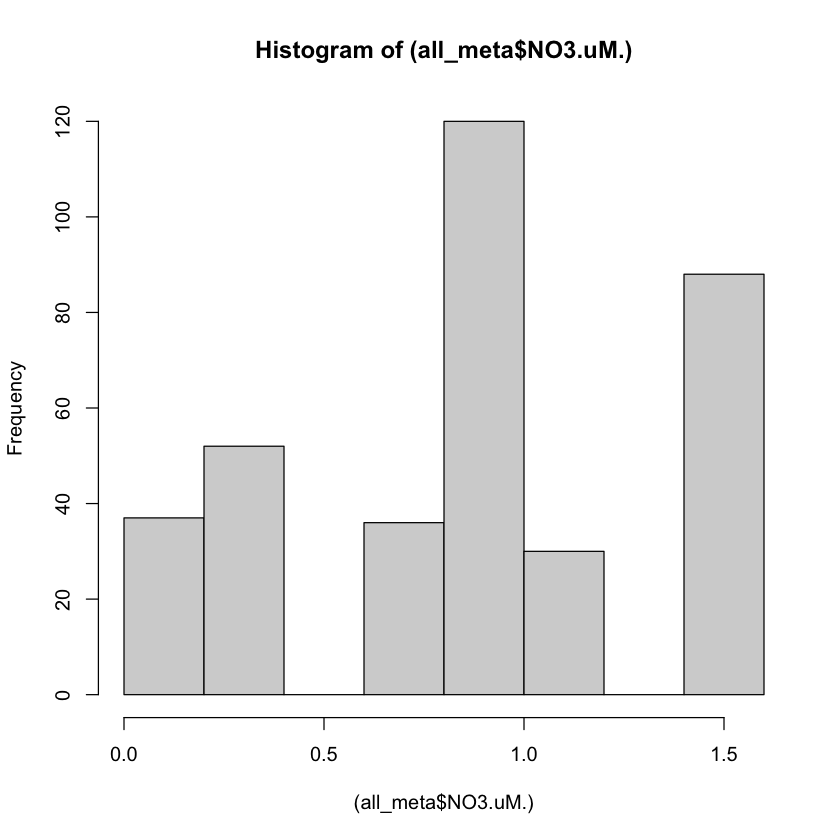

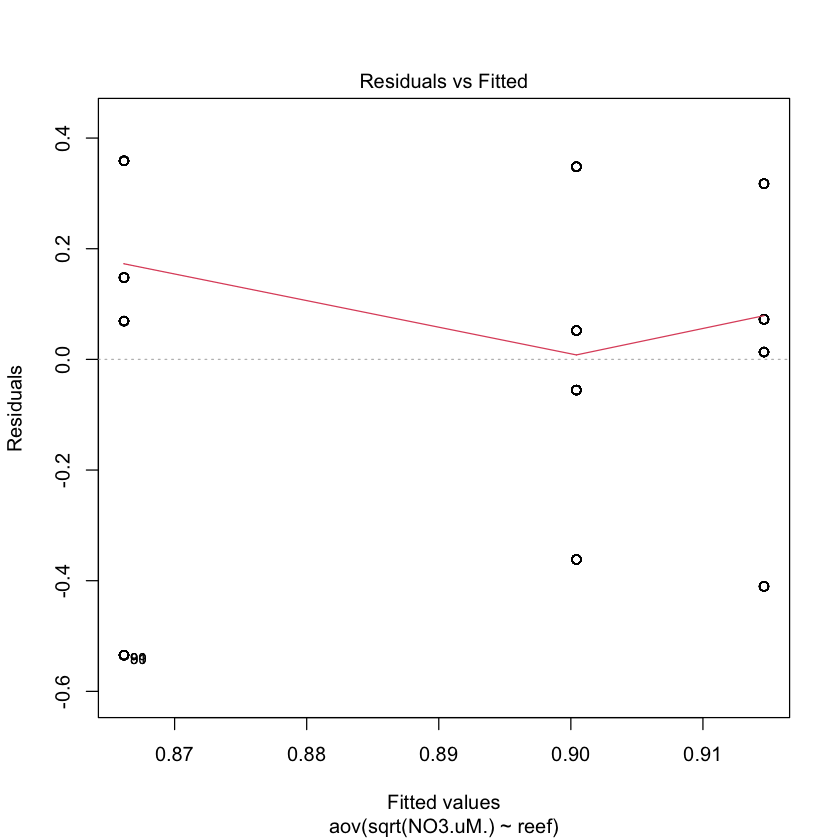

In [42]:
hist((all_meta$NO3.uM.))

res= aov(sqrt(NO3.uM.) ~ reef, data = all_meta)
summary(res)
TukeyHSD(res)
plot(res, which = 1)


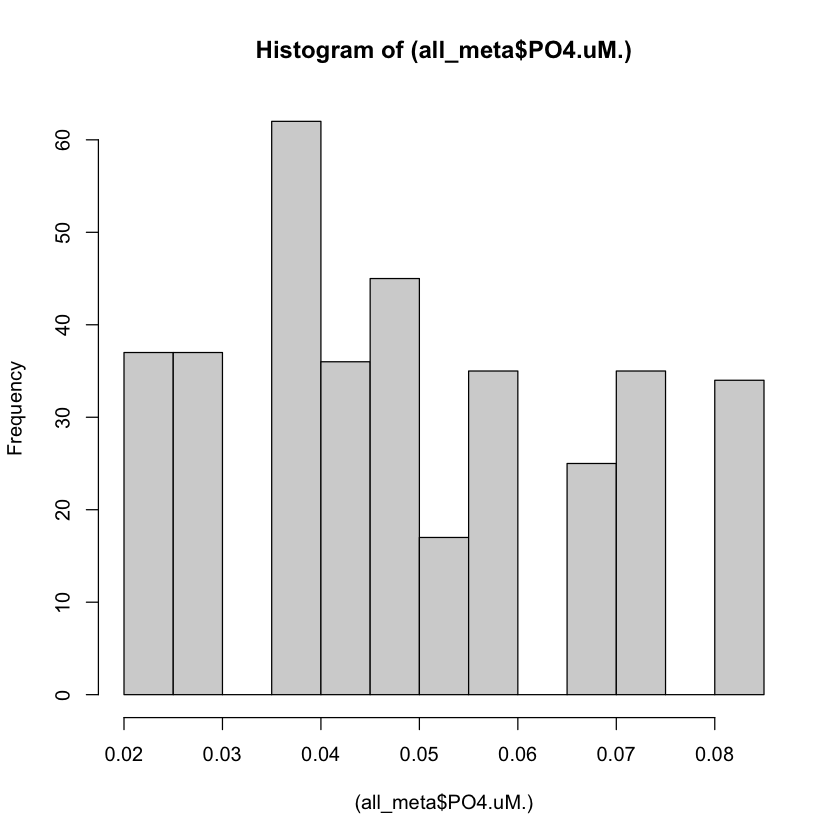

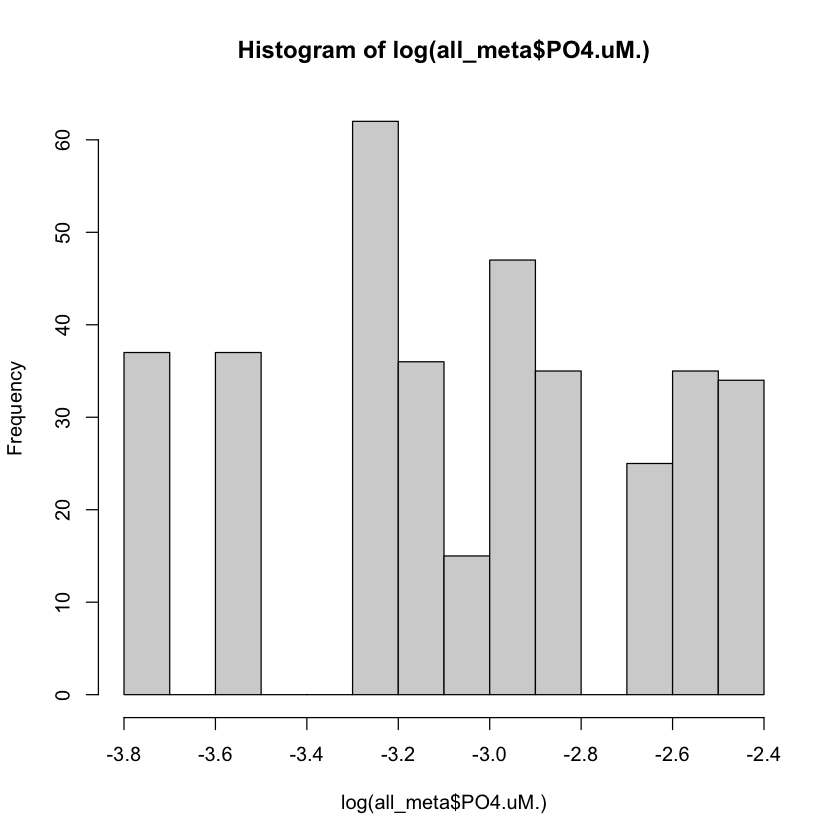

             Df Sum Sq Mean Sq F value  Pr(>F)   
reef          2   3.16  1.5805   5.262 0.00559 **
Residuals   360 108.13  0.3004                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log2(PO4.uM.) ~ reef, data = all_meta)

$reef
             diff         lwr         upr     p adj
ndr-cf -0.2432460 -0.42241000 -0.06408207 0.0043290
pr-cf  -0.1188593 -0.29707306  0.05935440 0.2601648
pr-ndr  0.1243867 -0.02979344  0.27856683 0.1405193


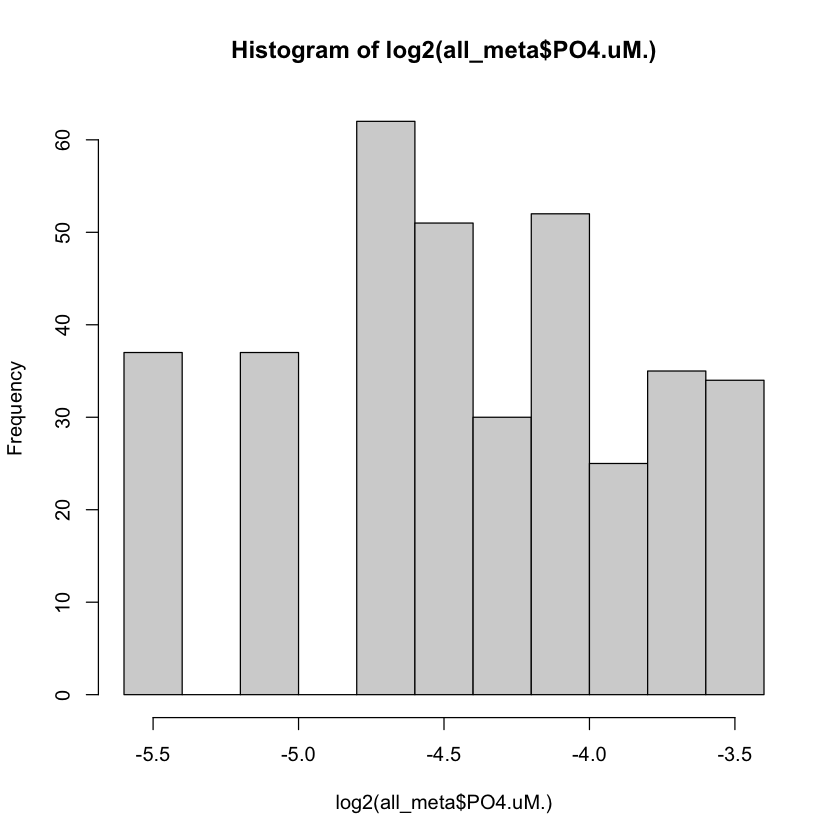

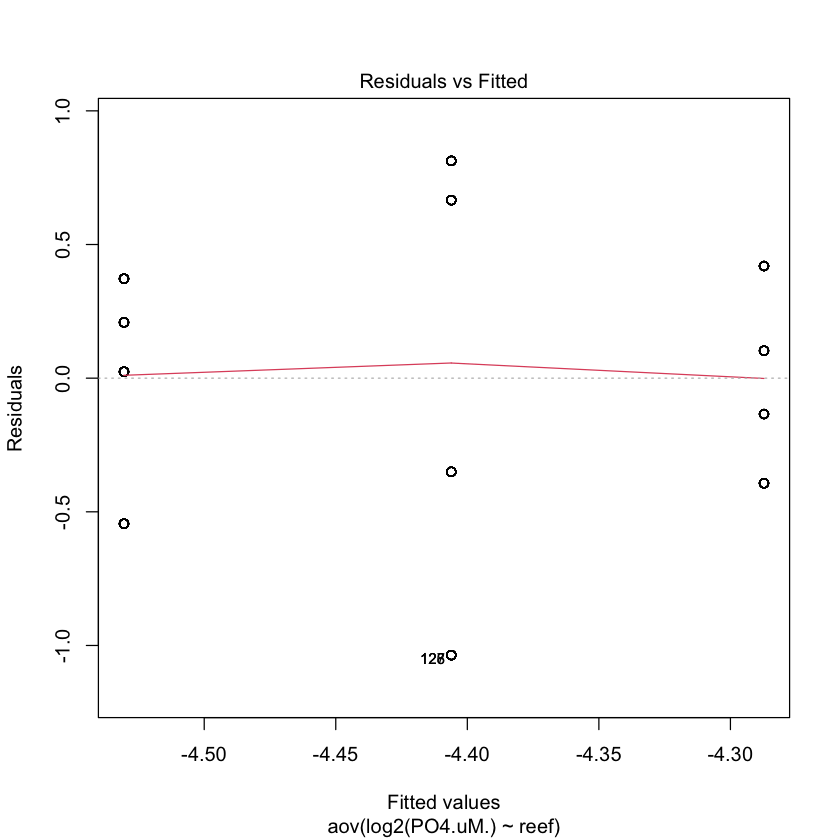

In [43]:
hist((all_meta$PO4.uM.))
hist(log(all_meta$PO4.uM.))
hist(log2(all_meta$PO4.uM.))

res= aov(log2(PO4.uM.) ~ reef, data = all_meta)
summary(res)
TukeyHSD(res)
plot(res, which = 1)

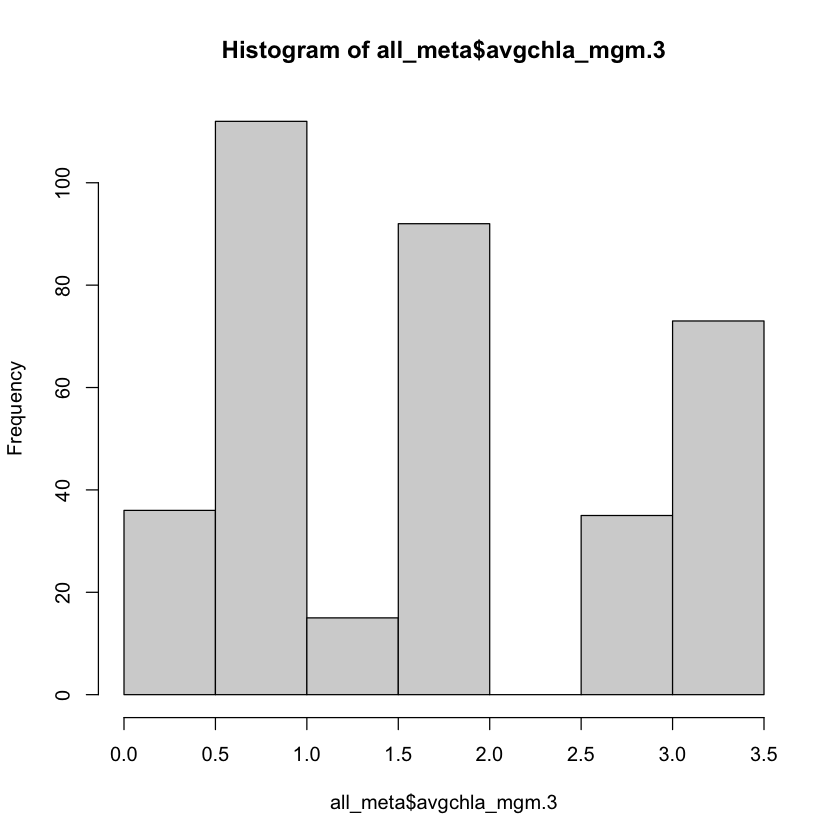

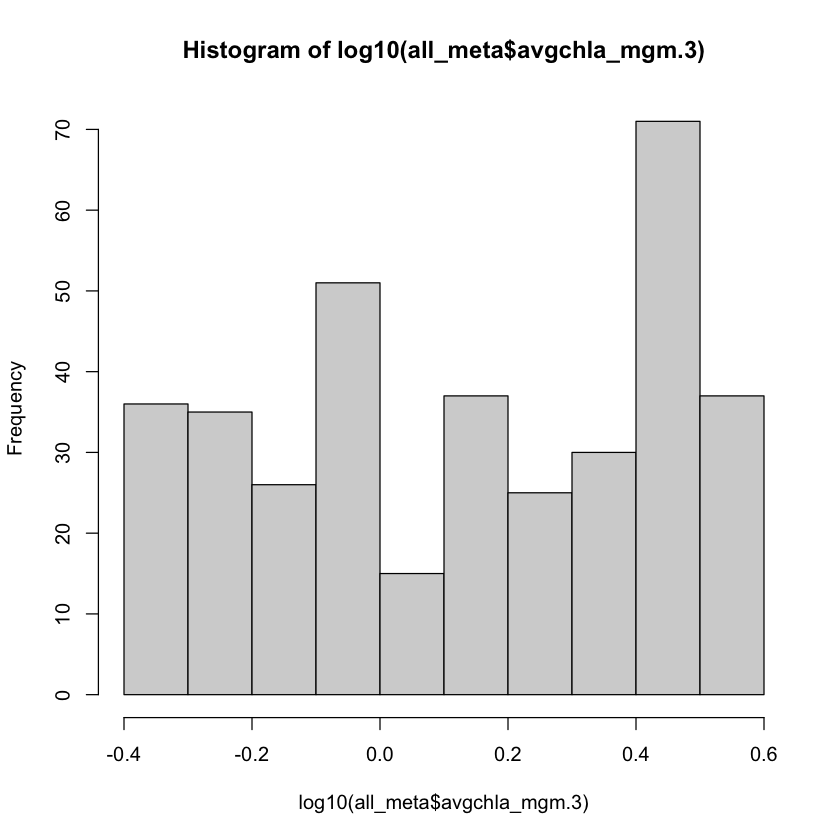

             Df Sum Sq Mean Sq F value Pr(>F)    
reef          2  46.05  23.024   597.1 <2e-16 ***
Residuals   360  13.88   0.039                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sqrt(avgchla_mgm.3) ~ reef, data = all_meta)

$reef
             diff        lwr        upr p adj
ndr-cf  0.5996735  0.5354826  0.6638644     0
pr-cf  -0.1886210 -0.2524715 -0.1247705     0
pr-ndr -0.7882945 -0.8435342 -0.7330548     0


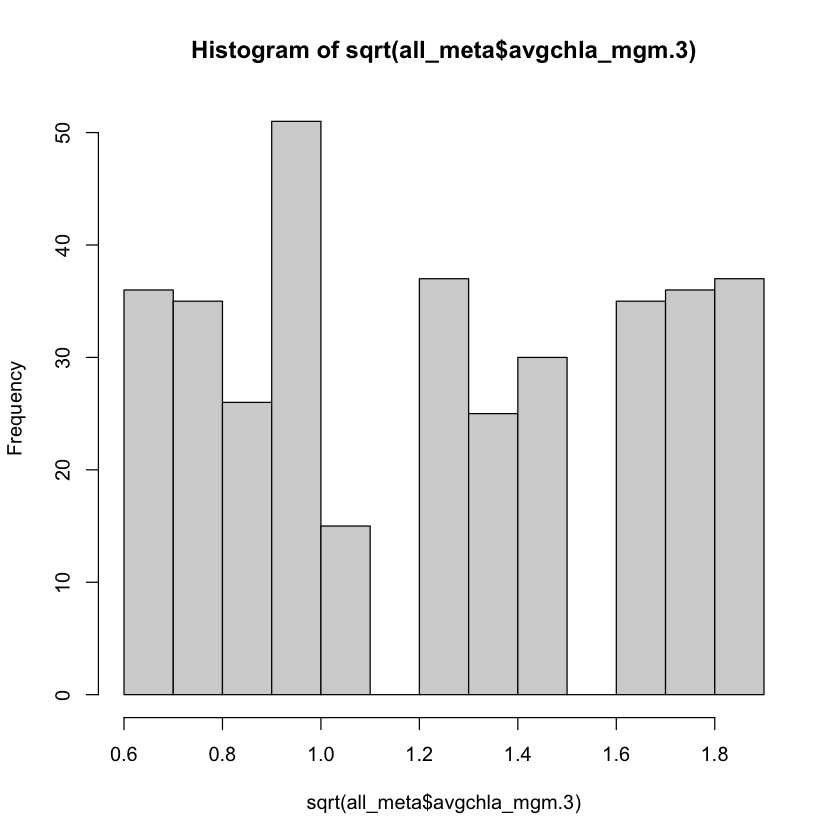

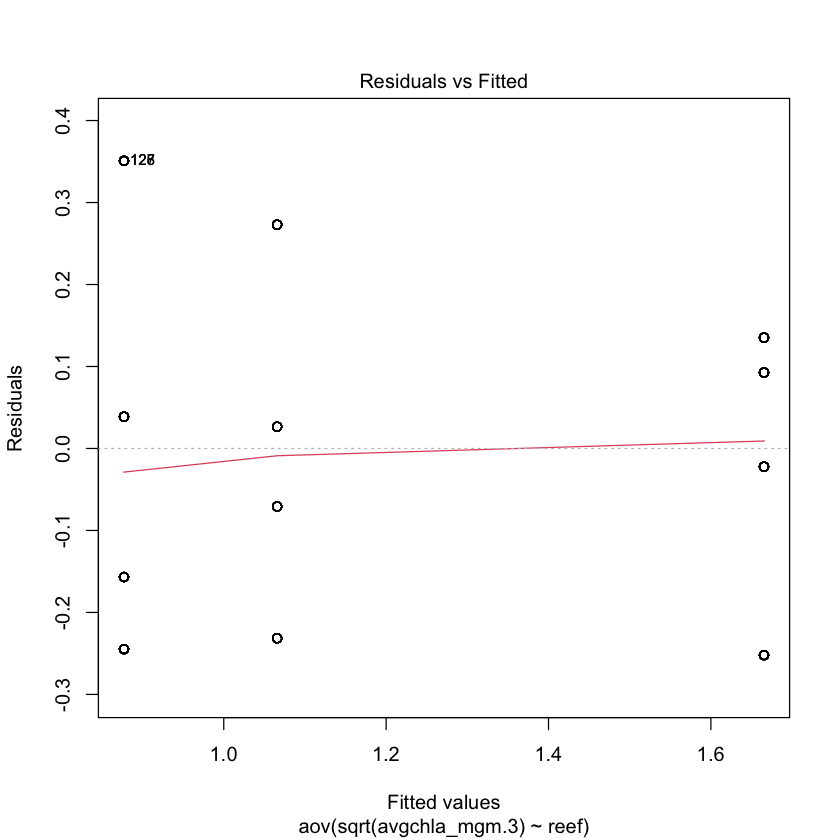

In [44]:
hist(all_meta$avgchla_mgm.3)
hist(log10(all_meta$avgchla_mgm.3))
hist(sqrt(all_meta$avgchla_mgm.3))

res= aov(sqrt(avgchla_mgm.3) ~ reef, data = all_meta)
summary(res)
TukeyHSD(res)

plot(res, which = 1)